# Minimal Surface Code

We start with some preliminary packages and functions, nothing fancy.

In [36]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister
# Loading your IBM Q account(s)
#IBMQ.save_account('1111fdc84fb52cd6a6ae57fc29ae3166444b265152e05e051e3c5051a3891f9c278fc82caee116aac2e46be7825435a4851613049483e87e281ff4cb6ee13158')


In [37]:
#secondary modules
import numpy as np
import scipy
import matplotlib.pyplot as plt
import random

$ZZ$ stabilizer function

In [38]:
### ZZ (bit-flip) stabilizer 
def ZZ(circ, qubit_1, qubit_2, ancilla_qubit, classical_bit):
    #Z1Z2 Measurements
    circ.cx(qubit_1, ancilla_qubit)
    circ.cx(qubit_2, ancilla_qubit)
    circ.measure(ancilla_qubit, classical_bit)
    return

## Definition of the initial quantum circuits

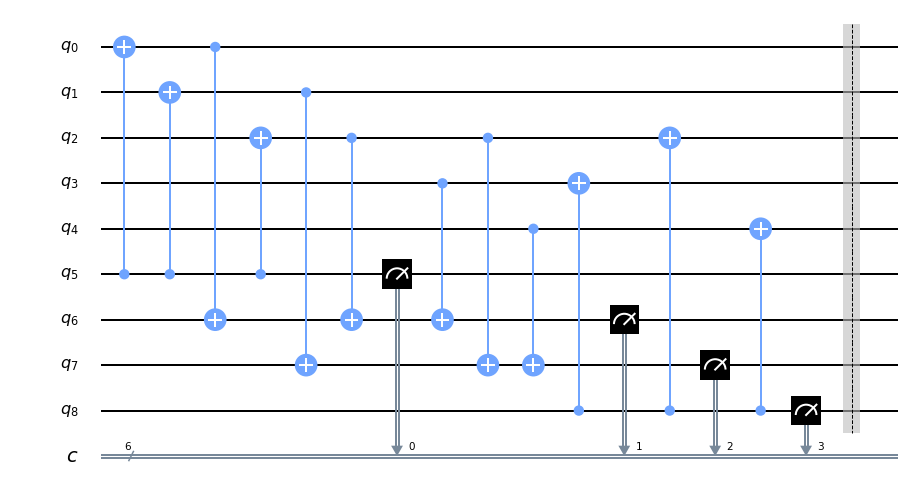

In [73]:
def Minsurf(q1,q2,q3,q4,q5,a1,a2,a3,a4):
    circ = QuantumCircuit(5+4,4+2)
    
    #You can put errors here
    #circ.x(q3)
    
    
    #The code
    #A1
    circ.cx(a1,q1)
    circ.cx(a1,q2)
    circ.cx(a1,q3)
    
    #A2
    circ.cx(q1,a2)
    circ.cx(q3,a2)
    circ.cx(q4,a2)
    
    #A3
    circ.cx(q2,a3)
    circ.cx(q3,a3)
    circ.cx(q5,a3)
    
    #A4
    circ.cx(a4,q4)
    circ.cx(a4,q3)
    circ.cx(a4,q5)
    
    #Measure
    circ.measure(a1,0)
    circ.measure(a2,1)
    circ.measure(a3,2)
    circ.measure(a4,3)
    
    circ.barrier()
    return circ

circ=Minsurf(0,1,2,3,4,5,6,7,8)
circ.draw(output="mpl")

### Logical gates definitions

In [74]:
#X gate on all qubits received
def LogX(circ, qubits):
    for i in range (int(len(qubits))):
        circ.x(qubits[i])
        return

#Z gate on all qubits received
def LogZ(circ, qubits):
    for i in range (len(qubits)):
        circ.z(qubits[i])
        return
    
def LogMeasure(circ, bits):
    for i in range (int(len(bits)/2)):
        circ.measure(bits[i], bits[-i-1])
    return

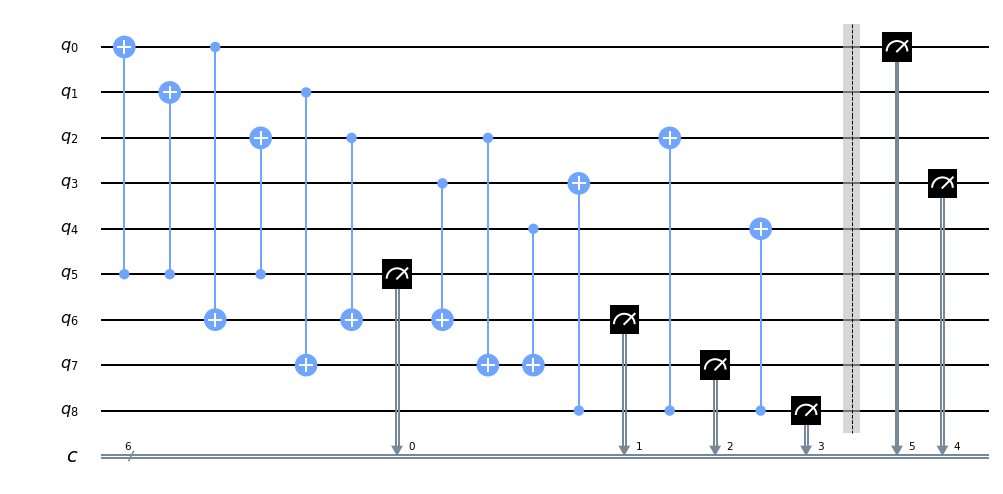

In [75]:
LogMeasure(circ,[0,3,4,5])
circ.draw(output="mpl")

In [76]:
from qiskit.providers.aer import noise  # import Aer noise models

# Choose a real device to simulate
IBMQ.load_account()
device = IBMQ.get_backend('ibmq_16_melbourne')
properties = device.properties()
coupling_map = device.configuration().coupling_map

# Generate an Aer noise model for device
noise_model = noise.device.basic_device_noise_model(properties)
basis_gates = noise_model.basis_gates

C:\Users\User\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '
C:\Users\User\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:595: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


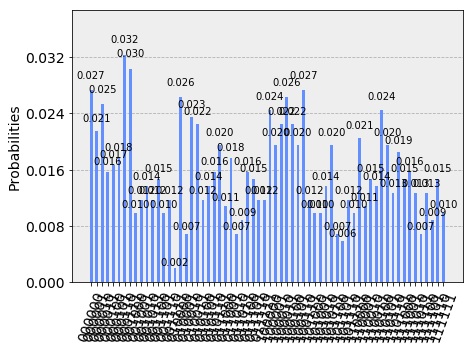

In [127]:
# Perform noisy simulation
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend,
                  coupling_map=coupling_map,
                  noise_model=noise_model,
                  basis_gates=basis_gates)
sim_result = job_sim.result()
counts = sim_result.get_counts(circ)

#Plot results
from qiskit import visualization
#print(counts)
visualization.plot_histogram(counts)

In [128]:
print(counts)

{'011110': 12, '011011': 9, '000011': 16, '011000': 11, '010100': 12, '111001': 16, '010010': 24, '000110': 33, '110011': 14, '001101': 10, '001110': 12, '001100': 15, '110111': 19, '000010': 26, '000100': 17, '100100': 23, '100101': 20, '110010': 15, '001010': 14, '001111': 2, '011010': 7, '101110': 12, '110101': 20, '010111': 20, '001001': 12, '100011': 27, '100000': 25, '011111': 12, '100110': 28, '101100': 7, '101101': 6, '001000': 10, '111100': 13, '111111': 10, '111101': 9, '010001': 7, '100010': 23, '111011': 7, '010110': 16, '111000': 15, '111010': 13, '110001': 11, '000111': 31, '101011': 20, '010000': 27, '110100': 25, '110110': 13, '100111': 12, '000000': 28, '101001': 10, '011100': 16, '000101': 18, '010011': 23, '000001': 22, '010101': 14, '111110': 15, '101000': 10, '011001': 18, '110000': 21, '011101': 15, '101111': 10, '001011': 12, '101010': 14, '100001': 20}


reduced_counts function which gets rid of all the results that got less than a cretain threshold of counts. 

In [129]:
def reduced_counts (counts, #results and their respective counts
                    threshold #integer under which any result is moved from the counts 
                   ):
    results_over_threshold = 0
    for result in counts:
        if counts[result] < threshold:
            results_over_threshold = 0
            counts.pop(result)
            break
        else:
            results_over_threshold += 1
    if results_over_threshold == len(counts): #the counts dictionary is perfect and ready to send.
        return counts
    else:                                     #still low counts to remove. Repeat function!
        return (reduced_counts(counts,threshold))

1024 shots fired
threshold is 16.384
{'010010': 24, '000110': 33, '110111': 19, '000010': 26, '000100': 17, '100100': 23, '100101': 20, '110101': 20, '010111': 20, '100011': 27, '100000': 25, '100110': 28, '100010': 23, '000111': 31, '101011': 20, '010000': 27, '110100': 25, '000000': 28, '000101': 18, '010011': 23, '000001': 22, '011001': 18, '110000': 21, '100001': 20}


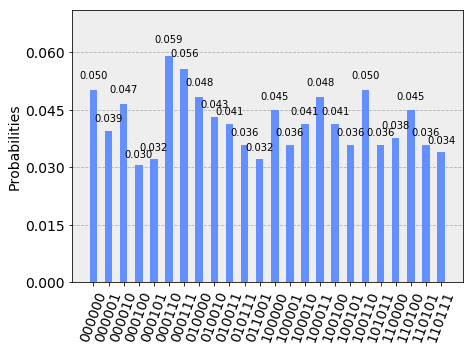

In [130]:
counts1 = counts
shots = 0
for result in counts1:
    shots += counts1[result]
    
print(shots, "shots fired")

threshold = 0.016*shots
print("threshold is", threshold)

print(reduced_counts(counts1,threshold))
visualization.plot_histogram(counts)